In [1]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [ ]:
#!unzip "/content/frames.zip" -d "/content/"

In [6]:
output_dir = 'detected'
os.makedirs(output_dir, exist_ok=True)

col_frames = os.listdir(r'D:\CV-LAB-Project\frames')

In [7]:
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

col_images = []
for i in tqdm(col_frames):
    img_path = os.path.join(r'D:\CV-LAB-Project\frames', i)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
    else:
        col_images.append(img)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Coding\AppData\Local\Temp\ipykernel_18988\1391192220.py:1: SyntaxWarning: invalid escape sequence '\D'
  col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))
  0%|          | 0/1108 [00:00<?, ?it/s]

100%|██████████| 1108/1108 [00:21<00:00, 51.85it/s]


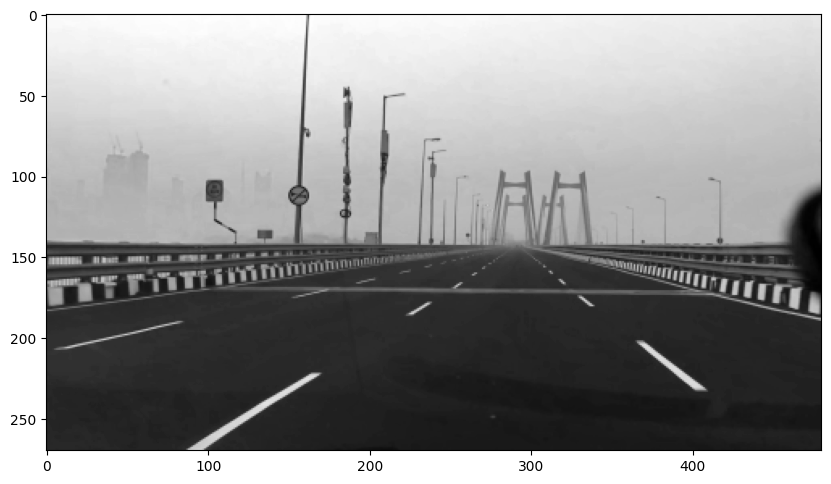

In [8]:
idx = 100
plt.figure(figsize=(10, 10))
plt.imshow(col_images[idx][:, :, 0], cmap="gray")
plt.show()

In [9]:
stencil = np.zeros_like(col_images[idx][:, :, 0])
polygon = np.array([[50, 270], [220, 160], [360, 160], [480, 270]])
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

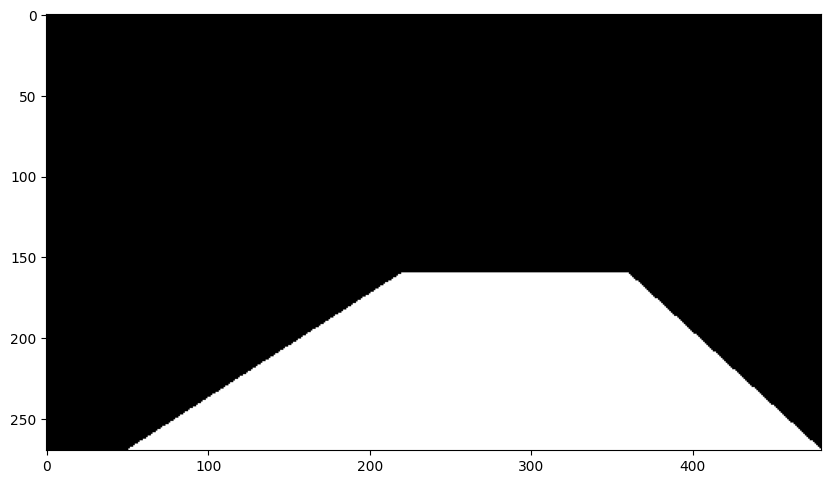

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(stencil, cmap="gray")
plt.show()

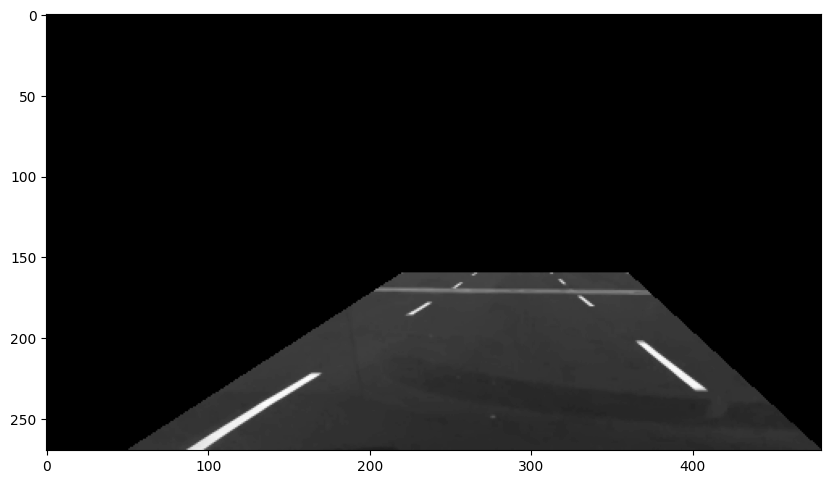

In [11]:
img = cv2.bitwise_and(col_images[idx][:, :, 0], col_images[idx][:, :, 0], mask=stencil)
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")
plt.show()

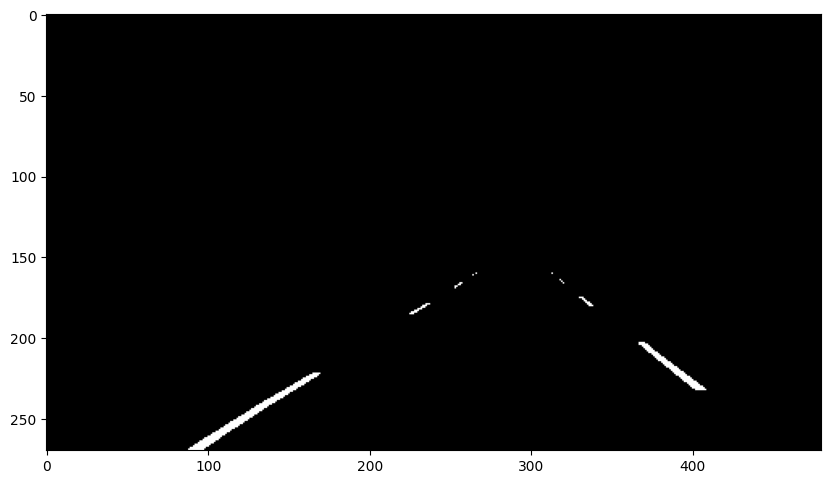

In [12]:
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)
plt.figure(figsize=(10, 10))
plt.imshow(thresh, cmap="gray")
plt.show()

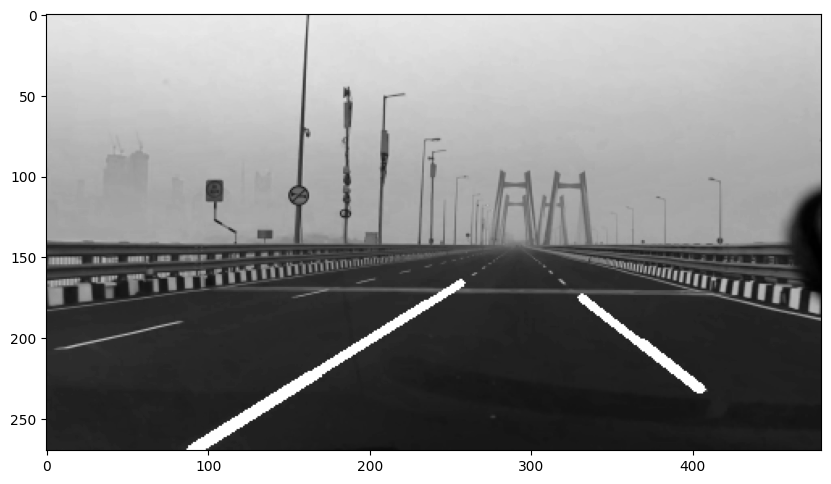

In [13]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
dmy = col_images[idx][:, :, 0].copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
plt.figure(figsize=(10, 10))
plt.imshow(dmy, cmap="gray")
plt.show()

In [14]:
cnt = 0

for img in tqdm(col_images):
    masked = cv2.bitwise_and(img[:, :, 0], img[:, :, 0], mask=stencil)
    ret, thresh = cv2.threshold(masked, 130, 145, cv2.THRESH_BINARY)
    lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
    dmy = img.copy()
    try:
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

        output_file = os.path.join(output_dir, f'{cnt}.png')
        success = cv2.imwrite(output_file, dmy)
        if not success:
            print(f"Failed to save image: {output_file}")
    except TypeError:
        output_file = os.path.join(output_dir, f'{cnt}.png')
        success = cv2.imwrite(output_file, img)
        if not success:
            print(f"Failed to save image: {output_file}")

    cnt += 1

100%|██████████| 1108/1108 [00:18<00:00, 58.54it/s]


In [15]:
pathIn = 'detected/'
pathOut = 'roads_v2.mp4'
fps = 30.0

In [16]:
if not os.path.exists(pathIn):
    os.makedirs(pathIn)
    print("Directory 'detected/' created.")
else:
    print("Directory 'detected/' already exists.")



Directory 'detected/' already exists.


In [17]:
from os.path import isfile, join
files = [f for f in os.listdir(pathIn) if os.path.isfile(os.path.join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_list = []
for file in files:
    img_path = os.path.join(pathIn, file)
    img = cv2.imread(img_path)
    if img is not None:
        frame_list.append(img)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Coding\AppData\Local\Temp\ipykernel_18988\3117237737.py:3: SyntaxWarning: invalid escape sequence '\D'
  files.sort(key=lambda f: int(re.sub('\D', '', f)))


In [18]:
out = None

for frame in frame_list:
    if out is None:
        height, width, _ = frame.shape
        size = (width, height)
        out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

        if out is None:
            print("Error creating VideoWriter object. Check output path and codec.")
            break


    out.write(frame)
if out is not None:
    out.release()